In [ ]:
# q3a

import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations (kinematic model)
def robot_kinematics(state, v, omega, dt):
    x, y, theta = state
    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dthetadt = omega
    # Update the state using Euler integration
    x_new = x + dxdt * dt
    y_new = y + dydt * dt
    theta_new = theta + dthetadt * dt
    return [x_new, y_new, theta_new]

# Simulation parameters
time_span = 30  # 30 seconds
dt = 0.1  # Time step of 0.1s
time_steps = int(time_span / dt)
time_array = np.arange(0, time_span + dt, dt)

# Define velocity profiles
def velocity_profile_1(t):
    return 1, 0  # [v, omega]

def velocity_profile_2(t):
    return 0, 0.3  # [v, omega]

def velocity_profile_3(t):
    return 1, 0.3  # [v, omega]

def velocity_profile_4(t):
    v = 1 + 0.1 * np.sin(t)
    omega = 0.2 + 0.5 * np.cos(t)
    return v, omega

# Simulate and store the results
def simulate_trajectory(profile_func, initial_state=[0, 0, 0]):
    # Initialize state and storage
    state = initial_state
    x_vals = [state[0]]
    y_vals = [state[1]]
    theta_vals = [state[2]]
    
    # Simulate over the given time span
    for i in range(time_steps):
        t = i * dt
        v, omega = profile_func(t)
        state = robot_kinematics(state, v, omega, dt)
        x_vals.append(state[0])
        y_vals.append(state[1])
        theta_vals.append(state[2])
    
    return x_vals, y_vals, theta_vals

# Plot results for each velocity profile
def plot_trajectory_and_variables(x_vals, y_vals, theta_vals, profile_label):
    # Create a figure for each profile
    plt.figure(figsize=(10, 10))

    # Plot the overhead 2D trajectory (x vs y)
    plt.subplot(4, 1, 1)
    plt.plot(x_vals, y_vals, label=profile_label)
    plt.title(f'2D Trajectory: {profile_label}')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid()
    plt.legend()

    # Plot x(t)
    plt.subplot(4, 1, 2)
    plt.plot(time_array, x_vals, label='x(t)')
    plt.ylabel('x [m]')
    plt.grid()

    # Plot y(t)
    plt.subplot(4, 1, 3)
    plt.plot(time_array, y_vals, label='y(t)')
    plt.ylabel('y [m]')
    plt.grid()

    # Plot θ(t)
    plt.subplot(4, 1, 4)
    plt.plot(time_array, theta_vals, label='θ(t)')
    plt.xlabel('Time [s]')
    plt.ylabel('θ [rad]')
    plt.grid()

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

# Velocity profile 1: v=1, ω=0
x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_1)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=1, ω=0')

# Velocity profile 2: v=0, ω=0.3
x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_2)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=0, ω=0.3')

# Velocity profile 3: v=1, ω=0.3
x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_3)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v=1, ω=0.3')

# Velocity profile 4: v(t) = 1 + 0.1*sin(t), ω(t) = 0.2 + 0.5*cos(t)
x_vals, y_vals, theta_vals = simulate_trajectory(velocity_profile_4)
plot_trajectory_and_variables(x_vals, y_vals, theta_vals, 'v(t) = 1 + 0.1*sin(t), ω(t) = 0.2 + 0.5*cos(t)')


In [ ]:
# q3b

# Define the constants for the wheel radius (r) and track width (T)
r = 0.1  # wheel radius in meters
T = 0.2  # track width in meters

# Function to calculate u_r and u_l based on v (linear velocity) and omega (angular velocity)
def calculate_wheel_speeds(v, omega, r, T):
    u_r = (v / r) + (T * omega) / (2 * r)
    u_l = (v / r) - (T * omega) / (2 * r)
    return u_r, u_l

# Define the different velocity profiles [v, omega]
velocity_profiles = [
    (1, 0),   # Case 1: v = 1 m/s, omega = 0 rad/s
    (0, 0.3), # Case 2: v = 0 m/s, omega = 0.3 rad/s
    (1, 0.3)  # Case 3: v = 1 m/s, omega = 0.3 rad/s
]

# Calculate and display the wheel speeds for each profile
for i, (v, omega) in enumerate(velocity_profiles, start=1):
    u_r, u_l = calculate_wheel_speeds(v, omega, r, T)
    print(f"Case {i}: v = {v} m/s, omega = {omega} rad/s")
    print(f"  Right wheel speed (u_r): {u_r:.2f} m/s")
    print(f"  Left wheel speed (u_l): {u_l:.2f} m/s")
    print()  # Add a blank line between cases


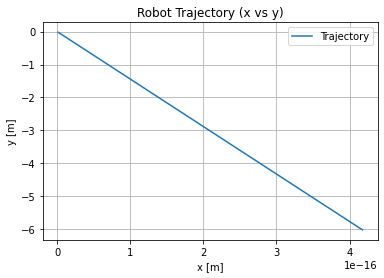

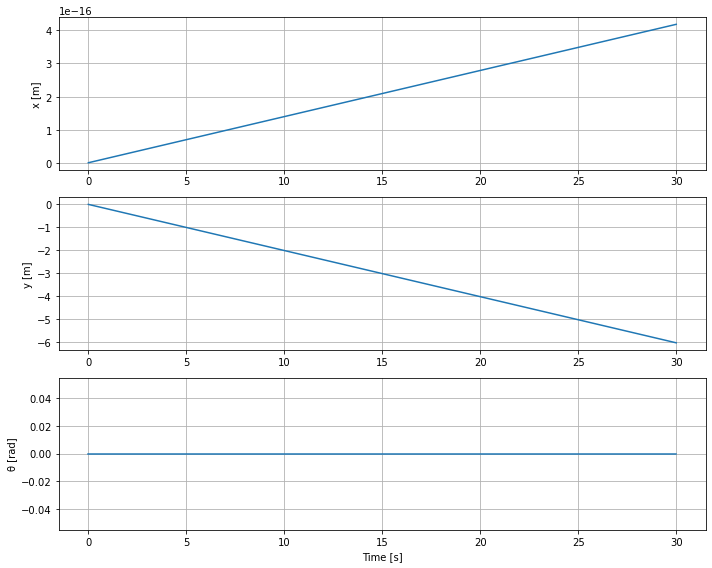

In [1]:
import numpy as np
from numpy import cos, sin, pi, float32
import matplotlib.pyplot as plt

# Parameters
r = 0.10  # Wheel radius in meters
l = 0.25  # Distance from the center to each wheel (in meters)
dt = 0.1  # Time step (s)
time_span = 30  # Total simulation time (s)

# Time array
time_array = np.arange(0, time_span + dt, dt)

# Wheel speeds (rad/s)
u = np.array([[-2.0], [1.0], [1.0]])

# Initialize the robot's state: [x, y, θ]
state = np.array([0, 0, 0], dtype=float32)  # [x, y, theta]

# Storage for x, y, and theta over time
x_vals = []
y_vals = []
theta_vals = []

# Define G(θ) matrix based on the current orientation (θ)
def G_matrix(t):
    G = 1/r * np.array([[cos(t + pi/2), sin(t + pi/2), l*sin(pi/2)], 
                [cos(t+7*pi/6), sin(t+7*pi/6), -l*sin(pi/6)*sin(7*pi/6)-l*cos(pi/6)*cos(7*pi/6)], 
                [cos(t+11*pi/6), sin(t+11*pi/6), -l*sin(pi/6)*sin(11*pi/6)+l*cos(pi/6)*cos(11*pi/6)]], dtype=float32)
    return G

# Simulation loop
for t in time_array:
    # Get the G(θ) matrix at the current orientation θ
    G_inv = np.linalg.inv(G_matrix(state[2]))
    
    # Calculate the robot's velocities: [vx, vy, omega]
    velocities = G_inv @ u
    
    # Update the robot's state using Euler integration
    state[0] += (velocities[0] * dt)[0]  # x position
    state[1] += (velocities[1] * dt)[0]  # y position
    state[2] += (velocities[2] * dt)[0]  # θ (orientation)
    
    # Store the state variables
    x_vals.append(state[0])
    y_vals.append(state[1])
    theta_vals.append(state[2])

# Plot the robot's motion (x, y) and the variables over time

# Plot the 2D trajectory (x vs y)
plt.figure()

plt.plot(x_vals, y_vals, label="Trajectory")
plt.title("Robot Trajectory (x vs y)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid()
plt.legend()

# Plot x(t), y(t), and θ(t) against time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, x_vals, label="x(t)")
plt.ylabel("x [m]")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time_array, y_vals, label="y(t)")
plt.ylabel("y [m]")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time_array, theta_vals, label="θ(t)")
plt.ylabel("θ [rad]")
plt.xlabel("Time [s]")
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from numpy import cos, sin, pi, float32
import matplotlib.pyplot as plt

# Parameters
r = 0.10  # Wheel radius in meters
l = 0.25  # Distance from the center to each wheel (in meters)
dt = 0.1  # Time step (s)
time_span = 30  # Total simulation time (s)

# Time array
time_array = np.arange(0, time_span + dt, dt)

# Initialize the robot's state: [x, y, θ]
state = np.array([0, 0, 0], dtype=float32)  # [x, y, theta]

# Storage for x, y, and theta over time
x_vals = []
y_vals = []
theta_vals = []

# Define G(θ) matrix based on the current orientation (θ)
def G_matrix(t):
    G = 1/r * np.array([[cos(t + pi/2), sin(t + pi/2), l*sin(pi/2)], 
                [cos(t+7*pi/6), sin(t+7*pi/6), -l*sin(pi/6)*sin(7*pi/6)-l*cos(pi/6)*cos(7*pi/6)], 
                [cos(t+11*pi/6), sin(t+11*pi/6), -l*sin(pi/6)*sin(11*pi/6)+l*cos(pi/6)*cos(11*pi/6)]], dtype=float32)
    return G

# Simulation loop
for t in time_array:
    # Get the G(θ) matrix at the current orientation θ
    G_inv = np.linalg.inv(G_matrix(state[2]))

    u = np.array([[1.0], [0.0], [1.0]], dtype=float32)
        
    # Calculate the robot's velocities: [vx, vy, omega]
    velocities = G_inv @ u
    
    # Update the robot's state using Euler integration
    state[0] += (velocities[0] * dt)[0]  # x position
    state[1] += (velocities[1] * dt)[0]  # y position
    state[2] += (velocities[2] * dt)[0]  # θ (orientation)
    
    # Store the state variables
    x_vals.append(state[0])
    y_vals.append(state[1])
    theta_vals.append(state[2])

# Plot the robot's motion (x, y) and the variables over time

# Plot the 2D trajectory (x vs y)
plt.figure()

plt.plot(x_vals, y_vals, label="Trajectory")
plt.title("Robot Trajectory (x vs y)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid()
plt.legend()

# Plot x(t), y(t), and θ(t) against time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, x_vals, label="x(t)")
plt.ylabel("x [m]")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time_array, y_vals, label="y(t)")
plt.ylabel("y [m]")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time_array, theta_vals, label="θ(t)")
plt.ylabel("θ [rad]")
plt.xlabel("Time [s]")
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from numpy import cos, sin, pi, float32
import matplotlib.pyplot as plt

# Parameters
r = 0.10  # Wheel radius in meters
l = 0.25  # Distance from the center to each wheel (in meters)
dt = 0.1  # Time step (s)
time_span = 30  # Total simulation time (s)

# Time array
time_array = np.arange(0, time_span + dt, dt)

# Initialize the robot's state: [x, y, θ]
state = np.array([0, 0, 0], dtype=float32)  # [x, y, theta]

# Storage for x, y, and theta over time
x_vals = []
y_vals = []
theta_vals = []

# Define G(θ) matrix based on the current orientation (θ)
def G_matrix(t):
    G = 1/r * np.array([[cos(t + pi/2), sin(t + pi/2), l*sin(pi/2)], 
                [cos(t+7*pi/6), sin(t+7*pi/6), -l*sin(pi/6)*sin(7*pi/6)-l*cos(pi/6)*cos(7*pi/6)], 
                [cos(t+11*pi/6), sin(t+11*pi/6), -l*sin(pi/6)*sin(11*pi/6)+l*cos(pi/6)*cos(11*pi/6)]], dtype=float32)
    return G

# Simulation loop
for t in time_array:
    # Get the G(θ) matrix at the current orientation θ
    G_inv = np.linalg.inv(G_matrix(state[2]))

    vx = 1.0  # Linear velocity along the slope direction
    vy = vx * np.tan(np.radians(60))  # y-component to achieve the slope
    omega = 0.0  # No rotation    
    u = G_matrix(0) @ np.array([[vx], [vy], [omega]], dtype=float32)
        
    # Calculate the robot's velocities: [vx, vy, omega]
    velocities = G_inv @ u
    
    # Update the robot's state using Euler integration
    state[0] += (velocities[0] * dt)[0]  # x position
    state[1] += (velocities[1] * dt)[0]  # y position
    state[2] += (velocities[2] * dt)[0]  # θ (orientation)
    
    # Store the state variables
    x_vals.append(state[0])
    y_vals.append(state[1])
    theta_vals.append(state[2])

# Plot the robot's motion (x, y) and the variables over time

# Plot the 2D trajectory (x vs y)
plt.figure()

plt.plot(x_vals, y_vals, label="Trajectory")
plt.title("Robot Trajectory (x vs y)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid()
plt.legend()

# Plot x(t), y(t), and θ(t) against time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, x_vals, label="x(t)")
plt.ylabel("x [m]")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time_array, y_vals, label="y(t)")
plt.ylabel("y [m]")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time_array, theta_vals, label="θ(t)")
plt.ylabel("θ [rad]")
plt.xlabel("Time [s]")
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()
